In [1]:
using BeamLib: IsotropicArray, steer, lasso
using LinearAlgebra
using Peaks
fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
Δ = 1

# test signal generation
Θ = deg2rad.([10, 65])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
x = s + n

θgrid = Vector(-90:90)
A = steer(pa, fc, deg2rad.(θgrid'))
spectrum = lasso(x[:,1:150], A, 27)
peaks = Peaks.findmaxima(spectrum)
Θest = θgrid[peaks.indices[sortperm(peaks.heights, rev=true)[1:d]]]
println(Θest)

[10, 65]


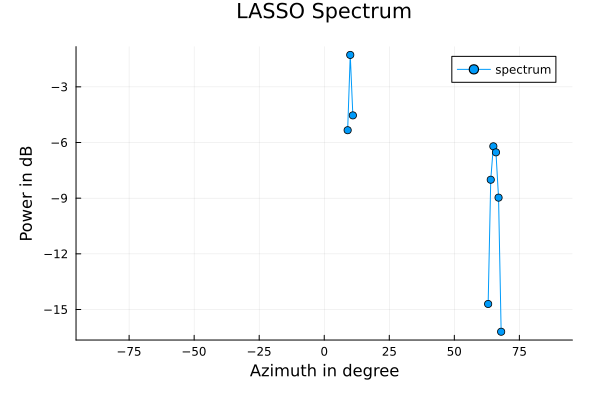

In [3]:
using Plots
import Measures
p1 = plot(θgrid, 10*log10.(abs.(spectrum)),marker=:dot, label="spectrum")
plot!(title="LASSO Spectrum", margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")